## 현재 경로 확인
os.getcwd()
## 파일 불러오기
boston = pd.read_csv('Boston_house.csv')
boston.head()

## 변수들의 통계량 확인하기
boston.describe()
## $\beta_{0}$ 추가
crim1 = sm.add_constant(crim, has_constant="add")

## OLS 적합
- ordinary least square (최소 제곱 회귀)
model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()

## 결과 출력: summary 함수
fitted_model1.summary()
- R-squared: Y의 총 변동성 중에 crim이 설명하는 변동성은 약 15%이다.
- coef: 범죄율이 1단위 증가할 때, Y가 0.4단위 감소하며, 이때 p-value는 유의미하다.

## 회귀 계수 출력
fitted_model1.params

## y -hat 계산
np.dot(crim1, fitted_model1.params)

pred1 = fitted_model1.predict(crim1)

## fitting 시각화
plt.scatter(crim, target, label ='data')

plt.plot(crim, pred1, label = 'pred result')

plt.legend()

plt.show()

## residual 시각화
fitted_model1.resid.plot()
plt.xlabel('residual')
plt.show()



In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv('Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [4]:
#boston = boston.drop(['Target'], axis=1)

In [3]:
boston.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [4]:
target  = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
lstat  = boston[['LSTAT']]

# model 1

In [5]:
# $\beta_{0} 추가$
crim1 = sm.add_constant(crim, has_constant="add")
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [6]:
# OLS 적합
# ordinary least square (최소 제곱 회귀)
model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()
# 결과 출력: summary 함수
# R-squared: Y의 총 변동성 중에 crim이 설명하는 변동성은 약 15%이다.
# coef: 범죄율이 1단위 증가할 때, Y가 0.4단위 감소하며, 이때 p-value는 유의미하다.
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           1.17e-19
Time:                        18:50:36   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# 회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [15]:
# y -hat 계산
np.dot(crim1, fitted_model1.params)
pred1 = fitted_model1.predict(crim1)
# residual 계산
np.dot(crim1, fitted_model1.params) - pred1

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

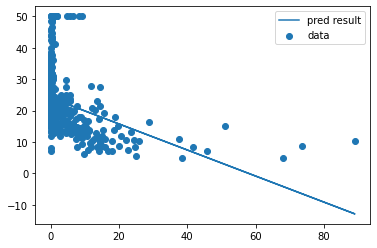

In [25]:
plt.scatter(crim, target, label ='data')
plt.plot(crim, pred1, label = 'pred result')
plt.legend()
plt.show()

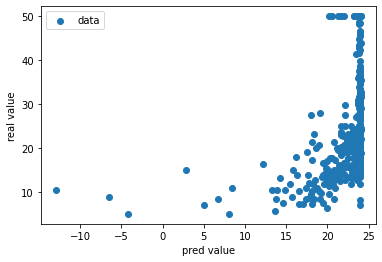

In [26]:
plt.scatter(pred1, target, label ='data')
plt.xlabel('pred value')
plt.ylabel('real value')
plt.legend()
plt.show()

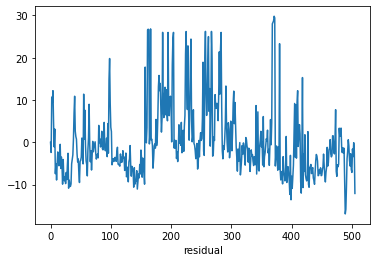

In [28]:
# residual 시각화
fitted_model1.resid.plot()
plt.xlabel('residual')
plt.show()

In [30]:
# residual의 합 계산
# 거의 0에 수렴하는 것을 확인할 수 있다. 최소제곱추정 과정에 의한 결과이다.
np.sum(fitted_model1.resid)

-3.751665644813329e-12

# model 2

In [7]:
# $\beta_{0} 추가$
lstat1 = sm.add_constant(lstat, has_constant="add")

In [8]:
# OLS 적합
# ordinary least square (최소 제곱 회귀)
model2 = sm.OLS(target, lstat1)
fitted_model2 = model2.fit()
pred2 = fitted_model2.predict(lstat1)
# 결과 출력: summary 함수
# R-squared: Y의 총 변동성 중에 crim이 설명하는 변동성은 약 15%이다.
# coef: 범죄율이 1단위 증가할 때, Y가 0.4단위 감소하며, 이때 p-value는 유의미하다.
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           5.08e-88
Time:                        18:50:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

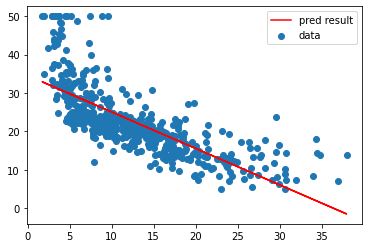

In [8]:
plt.scatter(lstat, target, label ='data')
plt.plot(lstat, pred2, label = 'pred result', c='r')
plt.legend()
plt.show()

<AxesSubplot:>

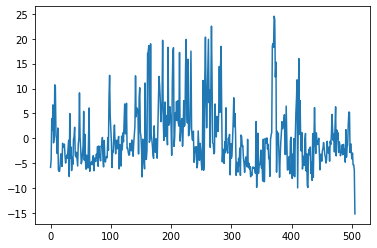

In [11]:
fitted_model2.resid.plot()

# 다중 선형 회귀분석
## 단순 선형회귀와 비교
### 다중 공선성
- 단순 선형회귀모델의 R-square 값의 합과 다중 선형회귀 모델 값의 차이 발생
- 이유: 각 변수가 Y변동성을 설명하는 비율이 겹치기 때문이다.
- 그 결과 회기 계수에 대한 절댓값도 감소한다.
- 그러나 다중공산성이 약간 존재함에도 불구하고, 
- p-value가 낮기 때문에 3개 변수를 한번에 고려하는 모델 사용이 적합하다고 할 수 있다.

In [9]:
x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [11]:
x_data1 = sm.add_constant(x_data, has_constant='add')

In [12]:
multi_model = sm.OLS(target, x_data1)
multi_fitted_model = multi_model.fit()

In [13]:
multi_fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Mon, 19 Jul 2021   Prob (F-statistic):          1.01e-112
Time:                        18:51:06   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
multi_fitted_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [15]:
# 단순 선형 회귀 계수와 달라진다.
print(fitted_model1.params)
print(fitted_model2.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64
